![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [178]:
import warnings
warnings.filterwarnings('ignore')

In [179]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz,DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,accuracy_score,f1_score
from sklearn.model_selection import train_test_split

In [180]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [181]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [182]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [183]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000


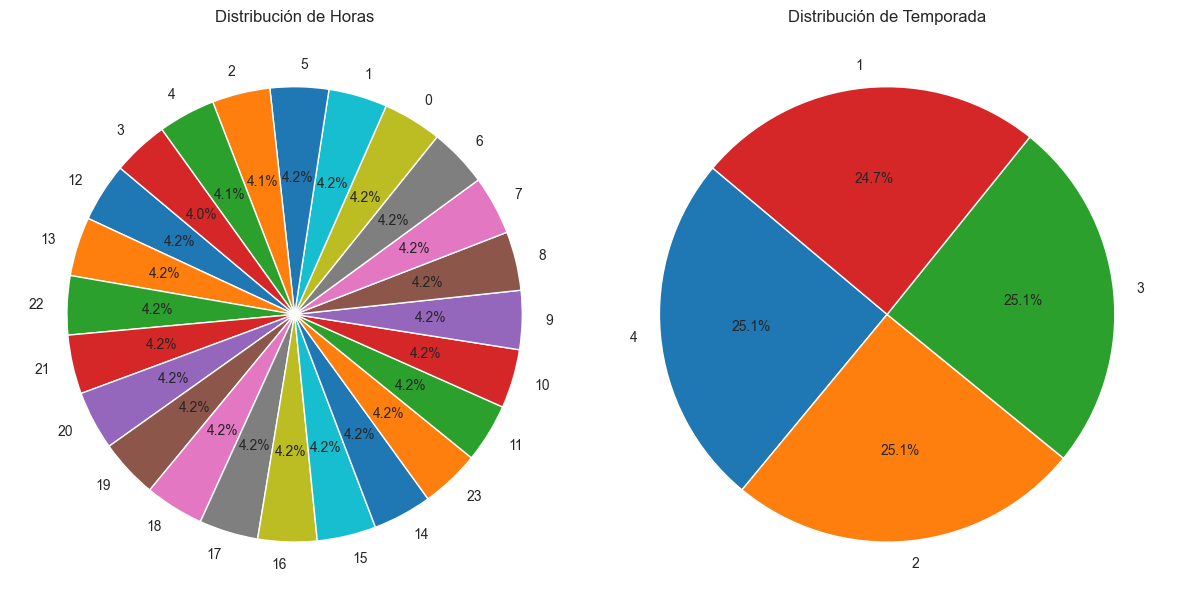

In [184]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
hours_counts = bikes['hour'].value_counts()
plt.pie(hours_counts, labels=hours_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Horas')

# Gráfico de torta para la temporada
plt.subplot(1, 2, 2)
season_counts = bikes['season'].value_counts()
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Temporada')

plt.tight_layout()
plt.show()


---
En los datos correspondientes a las estaciones, existen únicamente cuatro temporadas numeradas del uno al cuatro, representando respectivamente invierno, primavera, verano y otoño. Se cuenta con un total de 10,886 registros, mostrando una distribución uniforme de los datos para cada temporada.

Por otro lado, se presenta la distribución de las horas, que también muestra una distribución uniforme que abarca desde las 0 hasta las 23 horas, con igualmente 10,886 datos.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

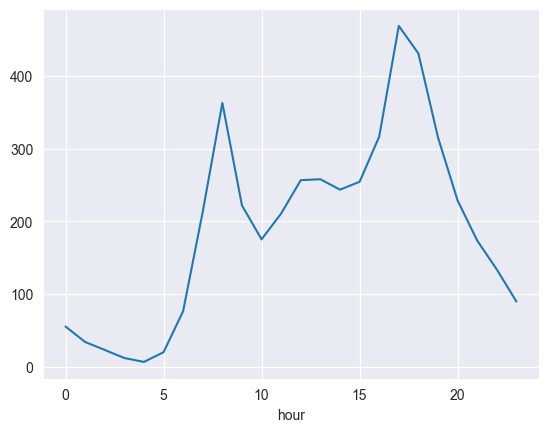

In [185]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

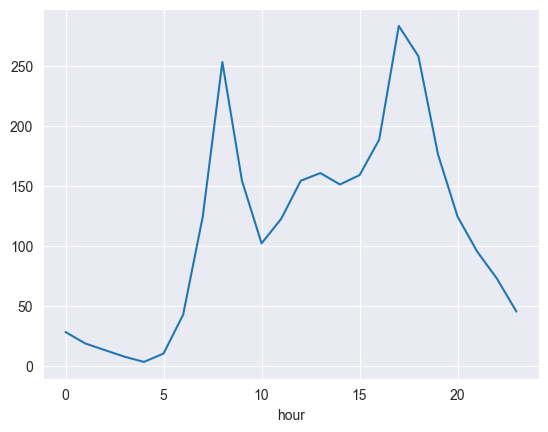

In [186]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes[bikes['season'] == 1].groupby('hour').total.mean().plot() 


<Axes: xlabel='hour'>

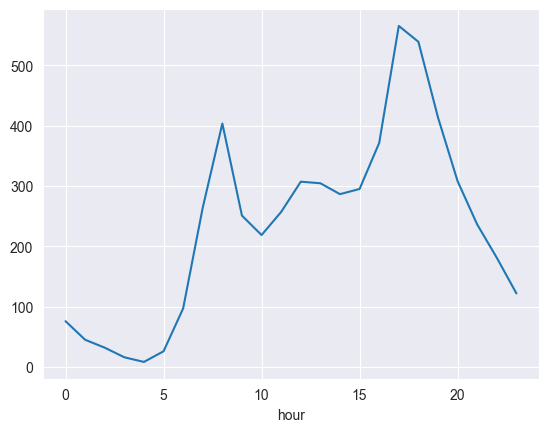

In [187]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos verano
bikes[bikes['season'] == 3].groupby('hour').total.mean().plot() 

Al comparar el resultrado obtenido de la comparacion de invierno y verano, se puede observar que en promedio se rentan mas bicicletas en vernano que en invierno  

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [188]:
# Celda 3
X = bikes[['hour', 'season']]
y = bikes['total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [189]:
print("Coeficientes:")
for coef, feature in zip(model.coef_, X.columns):
    print(f"{feature}: {coef}")
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio
mse_linear = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse_linear}")

Coeficientes:
hour: 10.562930663408432
season: 26.688945986529955
Error cuadrático medio: 28007.71803254829


Cuando todas las otras variables se quedan constantes cuando cambia la hora el total se ve afectado en 10.5 unidades por otro lado cuando todas las otras variables se quedan constantes y cambia la temporada el total cambia en 26.9 unidades.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [190]:
def calcular_varianza(y):
    return np.var(y)

def dividir(X, y, variable, valor):
    if variable == "hour":
        izquierda_idx = X['hour'] <= valor
    else:  # variable == "season"
        izquierda_idx = X['season'] == valor
    return X[izquierda_idx], y[izquierda_idx], X[~izquierda_idx], y[~izquierda_idx]

def mejor_division(X, y):
    mejor_varianza = float('inf')
    mejor_variable = None
    mejor_valor = None
    for variable in X.columns:
        valores = X[variable].unique()
        for valor in valores:
            _, y_izq, _, y_der = dividir(X, y, variable, valor)
            varianza_total = calcular_varianza(y_izq) * len(y_izq) + calcular_varianza(y_der) * len(y_der)
            if varianza_total < mejor_varianza:
                mejor_varianza = varianza_total
                mejor_variable = variable
                mejor_valor = valor
    return mejor_variable, mejor_valor

def construir_arbol(X, y, nodo=None, profundidad=0, max_profundidad=3):
    if profundidad == max_profundidad or len(X) < 2:
        return np.mean(y)
    
    variable, valor = mejor_division(X, y)
    if nodo is None:
        nodo = {}
    nodo['variable'] = variable
    nodo['valor'] = valor
    
    X_izq, y_izq, X_der, y_der = dividir(X, y, variable, valor)
    nodo['izquierda'] = construir_arbol(X_izq, y_izq, {}, profundidad + 1, max_profundidad)
    nodo['derecha'] = construir_arbol(X_der, y_der, {}, profundidad + 1, max_profundidad)
    
    return nodo

# Ejemplo de uso
arbol = construir_arbol(X_train, y_train, max_profundidad=3)
print(arbol)


{'variable': 'hour', 'valor': 6, 'izquierda': {'variable': 'hour', 'valor': 5, 'izquierda': {'variable': 'hour', 'valor': 1, 'izquierda': 45.41908713692946, 'derecha': 15.502762430939226}, 'derecha': {'variable': 'season', 'valor': 1, 'izquierda': 45.79775280898876, 'derecha': 87.46209386281589}}, 'derecha': {'variable': 'season', 'valor': 1, 'izquierda': {'variable': 'hour', 'valor': 20, 'izquierda': 174.51020408163265, 'derecha': 69.74444444444444}, 'derecha': {'variable': 'hour', 'valor': 20, 'izquierda': 316.1309243257397, 'derecha': 152.23019801980197}}}


In [191]:
def predecir_con_arbol(observacion, nodo):
    # Si el nodo es una hoja (nodo final), devuelve el valor
    if not isinstance(nodo, dict):
        return nodo
    
    # Decide si moverse hacia el nodo izquierdo o derecho
    if observacion[nodo['variable']] <= nodo['valor']:
        return predecir_con_arbol(observacion, nodo['izquierda'])
    else:
        return predecir_con_arbol(observacion, nodo['derecha'])

predicciones = X_test.apply(lambda obs: predecir_con_arbol(obs, arbol), axis=1)
predicciones

datetime
2011-09-05 11:00:00    316.130924
2012-03-18 04:00:00     15.502762
2012-10-14 17:00:00    316.130924
2011-04-04 15:00:00    316.130924
2012-12-11 02:00:00     15.502762
                          ...    
2012-07-11 05:00:00     15.502762
2011-10-06 03:00:00     15.502762
2011-01-10 12:00:00    174.510204
2012-10-09 14:00:00    316.130924
2011-05-18 20:00:00    316.130924
Length: 2178, dtype: float64

In [192]:
mse_linear_tree = mean_squared_error(y_test, predicciones)
print(f"Error cuadrático medio: {mse_linear_tree}")

Error cuadrático medio: 17649.68110121736


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [193]:
# Celda 5
modelo_libreria = DecisionTreeRegressor(max_depth=10)
modelo_libreria.fit(X_train, y_train)
predicciones_libreria = modelo_libreria.predict(X_test)
mse_arbol_libreria = mean_squared_error(y_test, predicciones_libreria)
mse_arbol_libreria

13010.586734491499

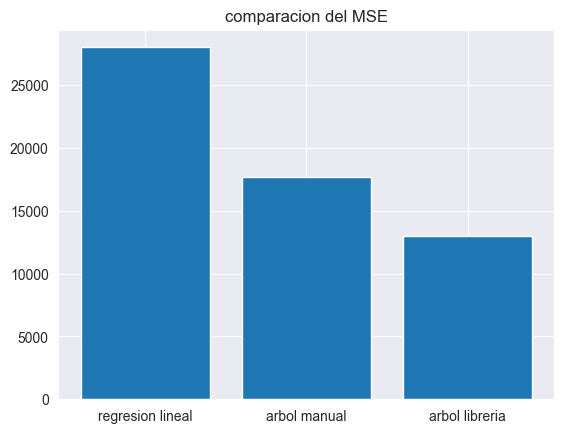

In [194]:
x = ["regresion lineal", "arbol manual", "arbol libreria"]
y = [mse_linear, mse_linear_tree, mse_arbol_libreria]

# Gráfico de barras
fig, ax = plt.subplots()
ax.bar(x = x, height = y)
plt.title("comparacion del MSE")
plt.show()


al realizar la comparattiva de los 3 modelos se puede obervar que el mejor modelo es el del arbol ya que presenta un mejor rendiemiento en comparacion a al modelo de regresion lineal ademas de esto se observa que el que tiene un mejor desempeño es el modelo que viene optimizado en la libreria ya que este tiene un MSE de 0.2

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [195]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [196]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [197]:
# División de la muestra en set de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [210]:
# Celda 6
logistic_regression_model = LogisticRegression(max_iter=50)
logistic_regression_model.fit(X_train,y_train)
predic_logistic= logistic_regression_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, predic_logistic)
f1_logistic = f1_score(y_test, predic_logistic)


In [212]:
decision_tree_classifer = DecisionTreeClassifier(max_depth=10)
decision_tree_classifer.fit(X_train,y_train)
predic_tree = decision_tree_classifer.predict(X_test)
accuracy_tree = accuracy_score(y_test, predic_tree)
f1_tree =f1_score(y_test, predic_tree)

In [213]:
print(f'accuracy logistic:{accuracy_logistic} tree:{accuracy_tree}')
print(f'f1 logistic:{f1_logistic} tree:{f1_tree}')

accuracy logistic:0.616 tree:0.5746666666666667
f1 logistic:0.6043956043956044 tree:0.5851755526657998


Al hacer la comparacion de los modelos el mejor modelo es de regresion logistica

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [199]:
# Celda 7


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [200]:
# Celda 8


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [201]:
# Celda 9